##**CO2 VEHICLE EMISSIONS ANALYSIS**

In [99]:
%cd /content/drive/MyDrive/Data Mining

/content/drive/MyDrive/Data Mining


**Include the required libraries**

In [100]:
# For EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# For Feature Selection
from sklearn.linear_model import LassoCV

# For Feature Scaling
from sklearn.preprocessing import StandardScaler

# For Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# For KNN
from sklearn.neighbors import KNeighborsRegressor

# For Random Forest
from sklearn.ensemble import RandomForestRegressor

# For Performance
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

# For Hyperparamater tuning
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV

**Load the Dataset**

In [101]:
df_15_19 = pd.read_csv('CO2_Emissions_15-19.csv')
df_20 = pd.read_csv('CO2_emissions_20.csv')
df_21 = pd.read_csv('CO2_emissions_21.csv')
df_22 = pd.read_csv('CO2_emissions_22.csv')
df_23 = pd.read_csv('CO2_emissions_23.csv')
df_24 = pd.read_csv('CO2_Emissions.csv')

df_15_19['Year'] = '2015-2019'
df_20['Year'] = '2020'
df_21['Year'] = '2021'
df_22['Year'] = '2022'
df_23['Year'] = '2023'
df_24['Year'] = '2024'

data = pd.concat([df_15_19, df_20, df_21, df_22, df_23, df_24], ignore_index=True)

print("Shape of combined DataFrame:", data.shape)

data.to_csv('combined_co2_emissions.csv', index=False)

Shape of combined DataFrame: (9929, 16)


In [102]:
data = pd.read_csv('combined_co2_emissions.csv')

**Data Preprocessing**

In [103]:
data.head()

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating,Year
0,2015,Acura,ILX,Compact,2.0,4,AS5,Z,9.7,6.7,8.3,34,191,NaN,NaN,2015-2019
1,2015,Acura,ILX,Compact,2.4,4,M6,Z,10.8,7.4,9.3,30,214,NaN,NaN,2015-2019
2,2015,Acura,ILX Hybrid,Compact,1.5,4,AV7,Z,6.0,6.1,6.1,46,140,NaN,NaN,2015-2019
3,2015,Acura,MDX SH-AWD,Sport utility vehicle: Small,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,NaN,NaN,2015-2019
4,2015,Acura,RDX AWD,Sport utility vehicle: Small,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,NaN,NaN,2015-2019


In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9929 entries, 0 to 9928
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model year            9929 non-null   int64  
 1   Make                  9929 non-null   object 
 2   Model                 9929 non-null   object 
 3   Vehicle class         9929 non-null   object 
 4   Engine size (L)       9929 non-null   float64
 5   Cylinders             9929 non-null   int64  
 6   Transmission          9929 non-null   object 
 7   Fuel type             9929 non-null   object 
 8   City (L/100 km)       9929 non-null   float64
 9   Highway (L/100 km)    9929 non-null   float64
 10  Combined (L/100 km)   9929 non-null   float64
 11  Combined (mpg)        9929 non-null   int64  
 12  CO2 emissions (g/km)  9929 non-null   int64  
 13  CO2 rating            8801 non-null   float64
 14  Smog rating           7695 non-null   float64
 15  Year                 

In [105]:
data.isna().sum()

Model year                 0
Make                       0
Model                      0
Vehicle class              0
Engine size (L)            0
Cylinders                  0
Transmission               0
Fuel type                  0
City (L/100 km)            0
Highway (L/100 km)         0
Combined (L/100 km)        0
Combined (mpg)             0
CO2 emissions (g/km)       0
CO2 rating              1128
Smog rating             2234
Year                       0
dtype: int64

In [106]:
data = data.drop(columns=['CO2 rating', 'Smog rating', 'Year'])

In [107]:
data.isna().sum()

Model year              0
Make                    0
Model                   0
Vehicle class           0
Engine size (L)         0
Cylinders               0
Transmission            0
Fuel type               0
City (L/100 km)         0
Highway (L/100 km)      0
Combined (L/100 km)     0
Combined (mpg)          0
CO2 emissions (g/km)    0
dtype: int64

In [108]:
data.rename(columns={
    'Model year': 'model_year',
    'Make': 'make',
    'Model': 'model',
    'Vehicle class': 'vehicle_class',
    'Engine size (L)': 'engine_size',
    'Cylinders': 'cylinders',
    'Transmission': 'transmission',
    'Fuel type': 'fuel_type',
    'City (L/100 km)': 'fuel_consumption_city',
    'Highway (L/100 km)': 'fuel_consumption_hwy',
    'Combined (L/100 km)': 'fuel_consumption_comb',
    'Combined (mpg)': 'fuel_consumption_comb_mpg',
    'CO2 emissions (g/km)': 'co2_emissions',
    'CO2 rating': 'co2_rating',
    'Smog rating': 'smog_rating'
}, inplace=True)

In [109]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
model_year,9929.0,2019.187934,2.812523,2015.0,2017.0,2019.0,2022.0,2024.0
engine_size,9929.0,3.142733,1.344662,0.9,2.0,3.0,3.7,8.4
cylinders,9929.0,5.612751,1.880870,3.0,4.0,6.0,6.0,16.0
fuel_consumption_city,9929.0,12.462977,3.410057,4.0,10.1,12.1,14.5,30.6
fuel_consumption_hwy,9929.0,9.125572,2.182264,3.9,7.6,8.8,10.3,20.9
fuel_consumption_comb,9929.0,10.960872,2.813258,4.0,9.0,10.6,12.6,26.1
fuel_consumption_comb_mpg,9929.0,27.492295,7.341116,11.0,22.0,27.0,31.0,71.0
co2_emissions,9929.0,253.277369,60.586835,94.0,209.0,249.0,292.0,608.0


In [110]:
data.dtypes

model_year                     int64
make                          object
model                         object
vehicle_class                 object
engine_size                  float64
cylinders                      int64
transmission                  object
fuel_type                     object
fuel_consumption_city        float64
fuel_consumption_hwy         float64
fuel_consumption_comb        float64
fuel_consumption_comb_mpg      int64
co2_emissions                  int64
dtype: object

In [111]:
data.head()

,model_year,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb,fuel_consumption_comb_mpg,co2_emissions
0,2015,Acura,ILX,Compact,2.0,4,AS5,Z,9.7,6.7,8.3,34,191
1,2015,Acura,ILX,Compact,2.4,4,M6,Z,10.8,7.4,9.3,30,214
2,2015,Acura,ILX Hybrid,Compact,1.5,4,AV7,Z,6.0,6.1,6.1,46,140
3,2015,Acura,MDX SH-AWD,Sport utility vehicle: Small,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2015,Acura,RDX AWD,Sport utility vehicle: Small,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


**Exploratory Data Analysis**

<ipython-input-112-09f617d4cfc5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='make', data=data, palette='flare', edgecolor='black')


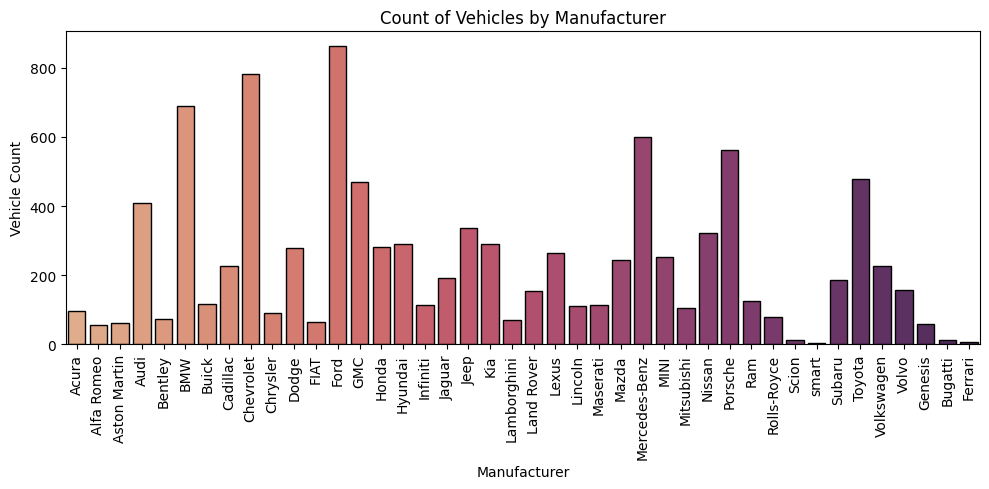

In [112]:
plt.figure(figsize=(10, 5))
sns.countplot(x='make', data=data, palette='flare', edgecolor='black')
plt.title('Count of Vehicles by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Vehicle Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<ipython-input-113-72bd0414cec0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='model_year', data=data, palette='flare', edgecolor='black', ax=ax1)


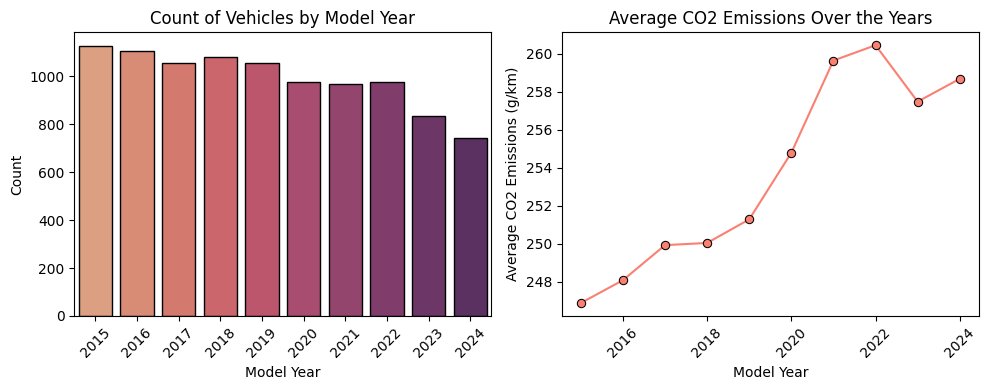

In [113]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

sns.countplot(x='model_year', data=data, palette='flare', edgecolor='black', ax=ax1)
ax1.set_title('Count of Vehicles by Model Year')
ax1.set_xlabel('Model Year')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=45)

avg_co2_emissions_year = data.groupby('model_year')['co2_emissions'].mean()

sns.lineplot(x=avg_co2_emissions_year.index, y=avg_co2_emissions_year.values, marker='o', color='salmon', ax=ax2, markeredgecolor = 'black')
ax2.set_title('Average CO2 Emissions Over the Years')
ax2.set_xlabel('Model Year')
ax2.set_ylabel('Average CO2 Emissions (g/km)')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()

plt.show()


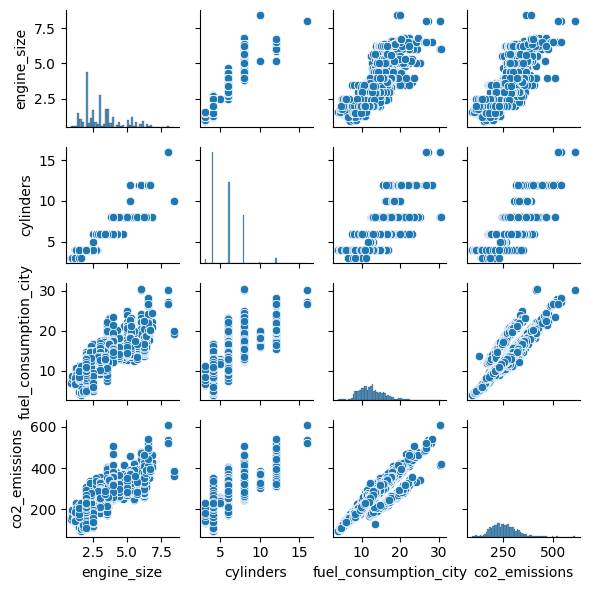

In [114]:
sns.pairplot(data[['engine_size', 'cylinders', 'fuel_consumption_city', 'co2_emissions']], height=1.5)
plt.tight_layout()
plt.show()

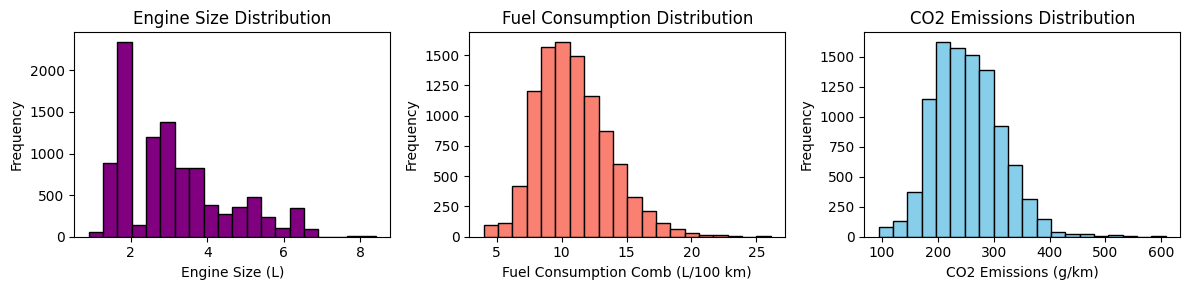

In [115]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))

axs[0].hist(data['engine_size'], bins=20, color='purple', edgecolor='black')
axs[0].set_title('Engine Size Distribution')
axs[0].set_xlabel('Engine Size (L)')
axs[0].set_ylabel('Frequency')

axs[1].hist(data['fuel_consumption_comb'], bins=20, color='salmon', edgecolor='black')
axs[1].set_title('Fuel Consumption Distribution')
axs[1].set_xlabel('Fuel Consumption Comb (L/100 km)')
axs[1].set_ylabel('Frequency')

axs[2].hist(data['co2_emissions'], bins=20, color='skyblue', edgecolor='black')
axs[2].set_title('CO2 Emissions Distribution')
axs[2].set_xlabel('CO2 Emissions (g/km)')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

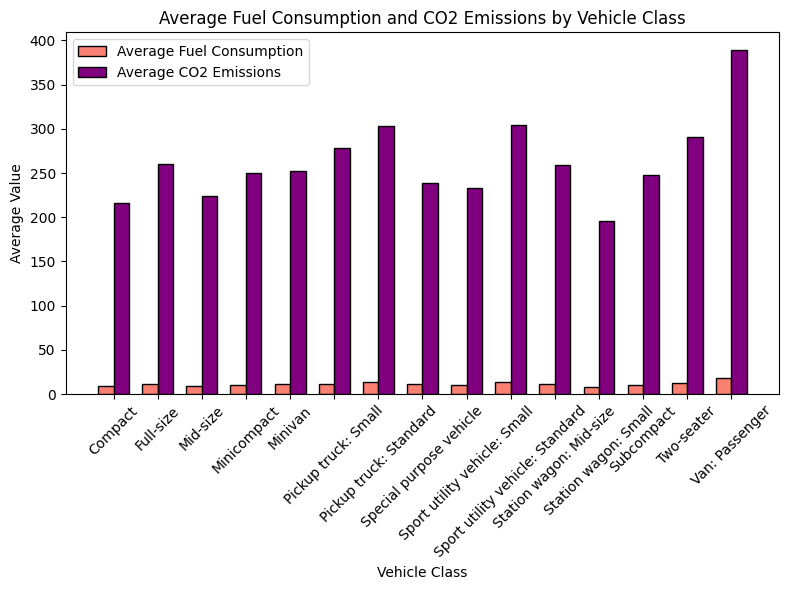

In [116]:
avg_fuel_consumption_class = data.groupby('vehicle_class')['fuel_consumption_comb'].mean()
avg_co2_emissions_class = data.groupby('vehicle_class')['co2_emissions'].mean()

x = range(len(avg_fuel_consumption_class))

width = 0.35

plt.figure(figsize=(8, 6))
plt.bar(x, avg_fuel_consumption_class, width, label='Average Fuel Consumption', color='salmon', edgecolor = 'black')
plt.bar([i + width for i in x], avg_co2_emissions_class, width, label='Average CO2 Emissions',color='purple', edgecolor = 'black')
plt.xlabel('Vehicle Class')
plt.ylabel('Average Value')
plt.title('Average Fuel Consumption and CO2 Emissions by Vehicle Class')
plt.xticks([i + width/2 for i in x], avg_fuel_consumption_class.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

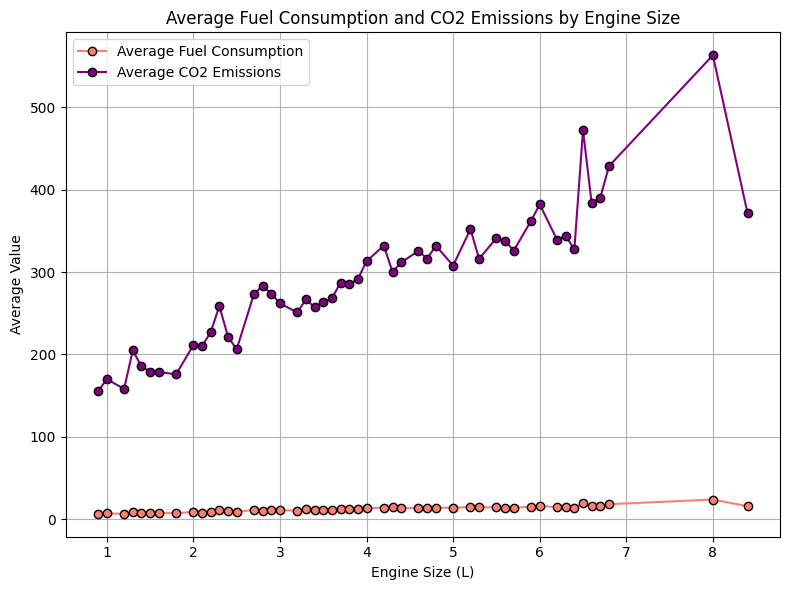

In [117]:
avg_fuel_consumption_engine = data.groupby('engine_size')['fuel_consumption_comb'].mean()
avg_co2_emissions_engine = data.groupby('engine_size')['co2_emissions'].mean()

plt.figure(figsize=(8, 6))
plt.plot(avg_fuel_consumption_engine.index, avg_fuel_consumption_engine, marker='o', label='Average Fuel Consumption', color='salmon', markeredgecolor='black')
plt.plot(avg_co2_emissions_engine.index, avg_co2_emissions_engine, marker='o', label='Average CO2 Emissions', color='purple', markeredgecolor='black')
plt.xlabel('Engine Size (L)')
plt.ylabel('Average Value')
plt.title('Average Fuel Consumption and CO2 Emissions by Engine Size')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Encoding the data**

In [118]:
categorical_columns = ['make', 'model', 'vehicle_class', 'transmission', 'fuel_type']

In [119]:
data = pd.get_dummies(data, columns=categorical_columns)
data.head()

,model_year,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb,fuel_consumption_comb_mpg,co2_emissions,make_Acura,make_Alfa Romeo,...,transmission_AV7,transmission_AV8,transmission_M5,transmission_M6,transmission_M7,fuel_type_D,fuel_type_E,fuel_type_N,fuel_type_X,fuel_type_Z
0,2015,2.0,4,9.7,6.7,8.3,34,191,True,False,...,False,False,False,False,False,False,False,False,False,True
1,2015,2.4,4,10.8,7.4,9.3,30,214,True,False,...,False,False,False,True,False,False,False,False,False,True
2,2015,1.5,4,6.0,6.1,6.1,46,140,True,False,...,True,False,False,False,False,False,False,False,False,True
3,2015,3.5,6,12.7,9.1,11.1,25,255,True,False,...,False,False,False,False,False,False,False,False,False,True
4,2015,3.5,6,12.1,8.7,10.6,27,244,True,False,...,False,False,False,False,False,False,False,False,False,True


**Splitting the data**

In [120]:
X = data.drop(['co2_emissions'], axis=1)
y = data['co2_emissions']

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Feature Selection**

In [122]:
lasso_model = LassoCV(cv=5)

lasso_model.fit(X_train, y_train)

selected_features = np.where(lasso_model.coef_ != 0)[0]
selected_feature_names = X.columns[selected_features]

X_train = X_train.iloc[:, selected_features]
X_test = X_test.iloc[:, selected_features]

print("Selected Features:", selected_feature_names)

Selected Features: Index(['model_year', 'cylinders', 'fuel_consumption_city',
       'fuel_consumption_hwy', 'fuel_consumption_comb',
       'fuel_consumption_comb_mpg', 'fuel_type_D', 'fuel_type_E'],
      dtype='object')


**Linear Regression**

In [123]:
linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)

Mean Squared Error: 13.706674869438556
Root Mean Squared Error: 3.702252674985671
R^2 Score: 0.9961518735807092


<Axes: xlabel='co2_emissions'>

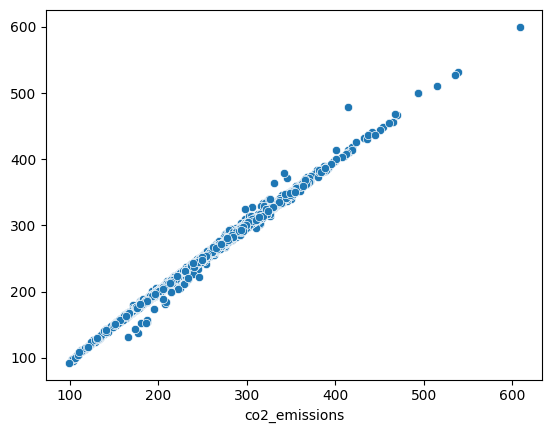

In [124]:
sns.scatterplot(x = y_test, y = y_pred)

**Lasso Regression**

In [125]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso_model = LassoCV(cv=5)

lasso_model.fit(X_train_scaled, y_train)

y_pred_lasso = lasso_model.predict(X_test_scaled)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Mean Squared Error (Lasso):", mse_lasso)
print("Root Mean Squared Error (Lasso):", rmse_lasso)
print("R^2 Score (Lasso):", r2_lasso)

Mean Squared Error (Lasso): 13.799234661234824
Root Mean Squared Error (Lasso): 3.7147321116380416
R^2 Score (Lasso): 0.9961258875714423


<Axes: xlabel='co2_emissions'>

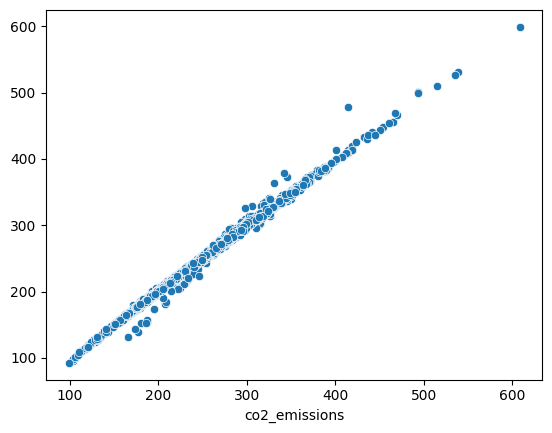

In [126]:
sns.scatterplot(x = y_test, y = y_pred_lasso)

**Lasso - Hyperparameter Tuning**

In [127]:
alphas = [0.01, 0.1, 1.0, 10.0]

lasso_cv = LassoCV(alphas=alphas, cv=5)

lasso_cv.fit(X_train_scaled, y_train)

best_alpha = lasso_cv.alpha_

y_pred_lasso_cv = lasso_cv.predict(X_test_scaled)

mse_lasso_cv = mean_squared_error(y_test, y_pred_lasso_cv)
rmse_lasso_cv = np.sqrt(mse_lasso_cv)
r2_lasso_cv = r2_score(y_test, y_pred_lasso_cv)

print("Best alpha:", best_alpha)
print("Mean Squared Error (Lasso with CV):", mse_lasso_cv)
print("Root Mean Squared Error (Lasso with CV):", rmse_lasso_cv)
print("R^2 Score (Lasso with CV):", r2_lasso_cv)

Best alpha: 0.01
Mean Squared Error (Lasso with CV): 13.82114094414082
Root Mean Squared Error (Lasso with CV): 3.717679510681471
R^2 Score (Lasso with CV): 0.9961197374185569


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4091.947537969827, tolerance: 2057.102786690648
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3329.4574927449285, tolerance: 2092.052241654677
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2928.497387229043, tolerance: 2032.733626690648
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWa

<Axes: xlabel='co2_emissions'>

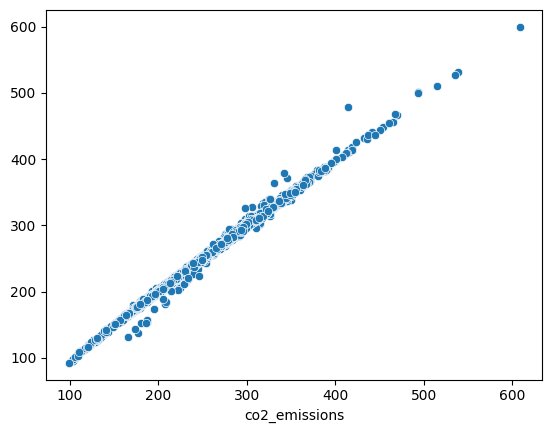

In [128]:
sns.scatterplot(x = y_test, y = y_pred_lasso_cv)

**K-nearest neighbour (knn)**

In [129]:
knn_model = KNeighborsRegressor(n_neighbors=5)

knn_model.fit(X_train_scaled, y_train)

y_pred_knn = knn_model.predict(X_test_scaled)

mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("Mean Squared Error (KNN):", mse_knn)
print("Root Mean Squared Error (KNN):", rmse_knn)
print("R^2 Score (KNN):", r2_knn)

Mean Squared Error (KNN): 9.62219536757301
Root Mean Squared Error (KNN): 3.1019663711221965
R^2 Score (KNN): 0.9972985844810477


<Axes: xlabel='co2_emissions'>

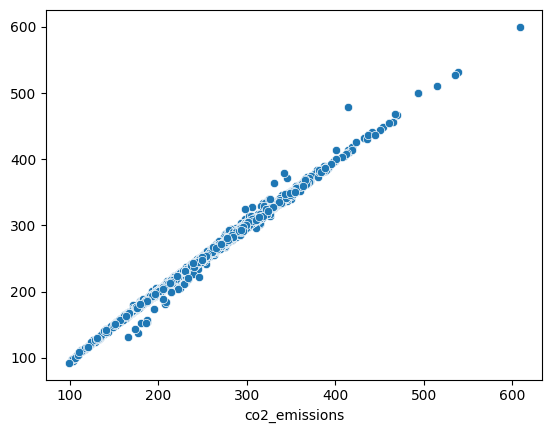

In [130]:
sns.scatterplot(x = y_test, y = y_pred)

**knn - Hyperparameter Tuning**

In [131]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn = KNeighborsRegressor()

grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='r2')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test)

mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best)

print("Mean Squared Error (Best Model):", mse_best)
print("Root Mean Squared Error (Best Model):", rmse_best)
print("R^2 Score (Best Model):", r2_best)

Best Hyperparameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Mean Squared Error (Best Model): 33.17193026982272
Root Mean Squared Error (Best Model): 5.759507814893797
R^2 Score (Best Model): 0.9906870351514068


<Axes: xlabel='co2_emissions'>

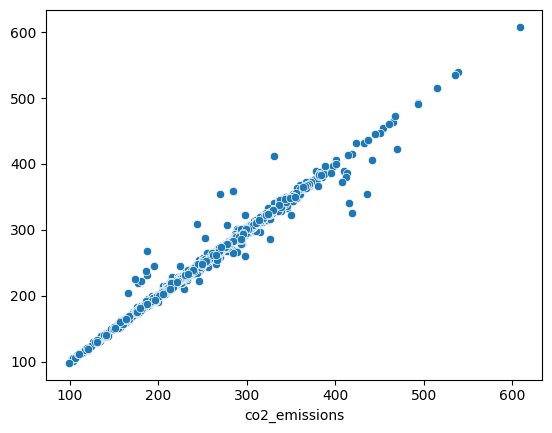

In [132]:
sns.scatterplot(x = y_test, y = y_pred_best)

**Random Forest**

In [153]:
rf = RandomForestRegressor()

rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Mean Squared Error (Random Forest):", mse_rf)
print("Root Mean Squared Error (Random Forest):", rmse_rf)
print("R^2 Score (Random Forest):", r2_rf)

Mean Squared Error (Random Forest): 4.712274268447171
Root Mean Squared Error (Random Forest): 2.170777341978484
R^2 Score (Random Forest): 0.9986770367517954


<Axes: xlabel='co2_emissions'>

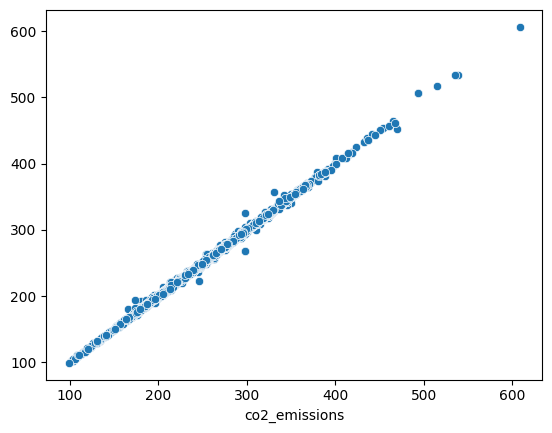

In [134]:
sns.scatterplot(x = y_test, y = y_pred_rf)

**Random Forest - Hyperparameter Tuning**

In [148]:
param_dist = {
    'n_estimators': randint(10, 200),
    'max_features': ['auto', 'sqrt'],
    'max_depth': randint(5, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False],
}

rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                               n_iter=100, cv=5, random_state=42, n_jobs=-1)

rf_random.fit(X_train_scaled, y_train)

best_params = rf_random.best_params_
print("Best Parameters:", best_params)

best_rf = rf_random.best_estimator_

y_pred_best = best_rf.predict(X_test_scaled)

mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best)

print("Mean Squared Error (Best Model):", mse_best)
print("Root Mean Squared Error (Best Model):", rmse_best)
print("R^2 Score (Best Model):", r2_best)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best Parameters: {'bootstrap': True, 'max_depth': 18, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 151}
Mean Squared Error (Best Model): 4.92042738640318
Root Mean Squared Error (Best Model): 2.2182036395252758
R^2 Score (Best Model): 0.9986185981063841


<Axes: xlabel='co2_emissions'>

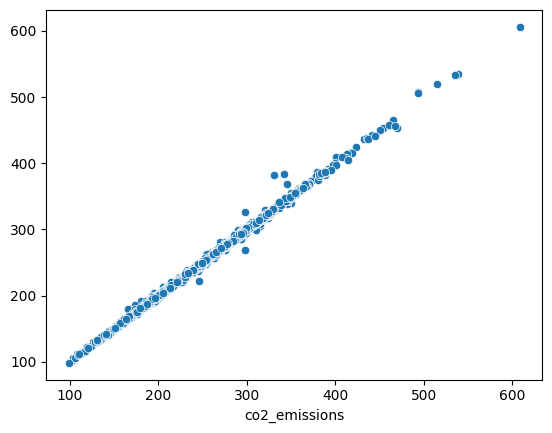

In [136]:
sns.scatterplot(x = y_test, y = y_pred_best)